# Longitudinal data analysis for sparse observations

Longitudinal data arises whenever we observe subjects over some period of time. A typical situation where such data is collected is a clinical setting where patients come to a clinic mulitple times in their lives and doctors measure certain parameters such as the glucose level.

## Bones dataset

A classical 'textbook' example of longitudinal data comes from a study of Bachrach et al. (1999), where they analyze spinal bone minaral density of patients. We load this data from the "Elements of statistical learning" book and we plot the first 100 observations, treating observations independently.

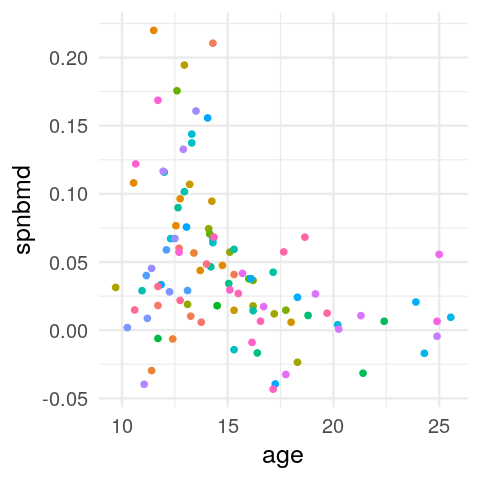

In [43]:
# Libraries and global settings
library("ElemStatLearn")
library("ggplot2")
options(repr.plot.width=4, repr.plot.height=4)
theme_set(theme_minimal(base_size = 15)) # for presentation clarity

ggplot(aes(x = age, y = spnbmd, color = factor(idnum)), data = bone[1:100,], width=100) +
    geom_point() + theme(legend.position="none")

Since data come from multiple observationso of patients, we have additional structure. Below, we connect with lines observations coming from the same patients.

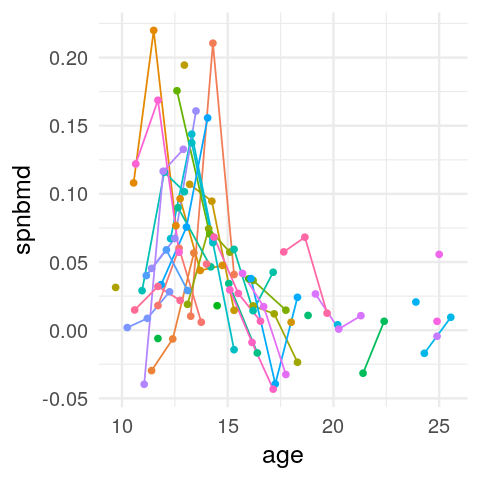

In [45]:
# Libraries and global settings
ggplot(aes(x = age, y = spnbmd, color = factor(idnum)), data = bone[1:100,], width=100) +
    geom_line() + geom_point() + theme(legend.position="none")

`fcomplete` package to estimate the individual progression trends of patients. While we have only a few observations per subject, methods we use leverage similarities between patients.

## Basic fit

To fit the model from Kidziński, Hastie (2018), you can simply use the `fregression` function from the package

In [61]:
library("fcomplete")
fit = fregression(spnbmd:age ~ 1|idnum, data = bone, d = 6, K = 2)

[1] 1


Warning message in args.smpl[[i]]$train <- args[[i]]:
“Coercing LHS to a list”

Combining 1 variables[1] 0.004890097
[1] 0.002422861
[1] 0.00148487
[1] 0.0008448611
[1] 0.0005844988
[1] 0.000445649
[1] 0.000366427
[1] 0.0003209984
[1] 0.0002956992
[1] 0.0002822959
[1] 0.0002756989
[1] 0.0002728334
[1] 0.0002718809
[1] 0.0002717703
[1] 0.0002718625
[1] 0.0002717693
[1] 0.0002712539
[1] 0.0002701761
[1] 0.0002684625
[1] 0.0002660873
[1] 0.0002630608
[1] 0.0002594189
[1] 0.0002552162
[1] 0.0002505185
[1] 0.000245398
[1] 0.0002399284
[1] 0.0002341817
[1] 0.000228226
[1] 0.0002221237
[1] 0.000215931
[1] 0.0002096974
[1] 0.0002034658
[1] 0.0001972732
[1] 0.0001911507
[1] 0.0001851246
[1] 0.0001792166
[1] 0.0001734448
[1] 0.0001678238
[1] 0.0001623654
[1] 0.0001570792
[1] 0.0001519725
[1] 0.0001470509
[1] 0.0001423186
[1] 0.0001377782
[1] 0.0001334315
[1] 0.0001292789
[1] 0.00012532
[1] 0.0001215536
[1] 0.0001179776
[1] 0.0001145893
[1] 0.0001113853
[1] 0.0001083616
[1] 0.0001055136
[1] 0.0001028364
[1] 0.0001003245
[1] 9.797228e-05
[1] 9.577353e-05
[1] 9.3722e-05
[1] 9.

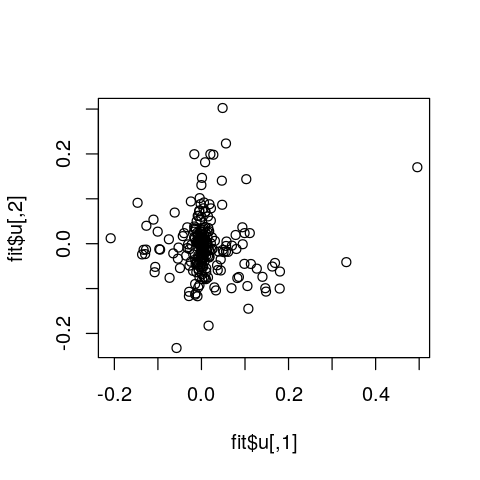

In [64]:

plot(fit$u)